<strong><font size="5">Table of Contents</font></strong>

* [1. Introduction](#introduction)
    * [1.1 Problem Area](#problem_area)
    * [1.2 Objectives](#objectives)
    * [1.3 Description of Dataset](#description_of_dataset)
    * [1.4 Evaluation Methodology](#evaluation_methodology)
* [2. Implementation](#implementation)
    * [2.1 Preprocessing](#preprocessing)
    * [2.2 Baseline Performance](#baseline_performance)
    * [2.3 Classification Approaches](#classification_approaches)
* [3. Conclusions](#conclusions)
    * [3.1 Evaluation](#evaluation)
    * [3.2 Summary and Conclusions](#summary_and_conclusions)
* [4. Bibliography](#bibliography)

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import warnings
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
import time
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from sklearn.neighbors import KNeighborsClassifier 

In [156]:
warnings.filterwarnings('ignore')

# Introduction <a class="anchor" id="introduction"></a>

## Problem Area <a class="anchor" id="problem_area"></a>

The Short Message Services (SMS) has been  widely used as a way to communicate around the world with the popularization of mobile phone over the past few decades. 5 billion people globally are currently using SMS message services which is around 65% of the world's population <cite id="68e8l"><a href="#zotero|11753474/9GRHSQJG">(SlickText, 2021)</a></cite>.

However, SMS spams which are unsolicited and undesired SMS potentially sent to a large number of receivers, are becoming a more and more severe problems. For example, up to 30% of text messages was spam in parts of Asia in 2012 <cite id="zkhoj"><a href="#zotero|11753474/79QVR66B">(Shirani-Mehr, 2013)</a></cite>.

The spam situation may be partly caused by the lowering cost of sending SMS spams with the advancement of technology and availability of unlimited SMS packages <cite id="u211t"><a href="#zotero|11753474/NW8BMZLC">(Delany et al., 2012)</a></cite>. For example, in China it costs less than $0.001 to send a text message. SMS spams is likely to affect user experience more significantly than other communication channels. Firstly, as users tend to view each SMS as soon as they receive it, it tends to be disturbing and waste users' time and energy to read those spams <cite id="u979a"><a href="#zotero|11753474/U75CN9KR">(Hameed, 2021)</a></cite>. Secondly, people rely on their personal mobile phone more and more. Users require more security of SMS compared to other communication channels <cite id="ex0jf"><a href="#zotero|11753474/DC3Z6LQI">(Sajedi et al., 2016)</a></cite>.Thirdly, besides loss of time and possible missing of important messages, in some countries receivers are charged for receiving spam SMS. Therefore, it is cheap for spam attackers to send messages while it is costly for users to receive those spam messages.

In addition, in terms of technical obstacles, the spam filtering capabilities of mobile phones is relatively weak due to the limits of computational resources which makes the tasks of identifying SMS spams more difficult and less efficient <cite id="rn38u"><a href="#zotero|11753474/4YR5RNFD">(Liu et al., 2021)</a></cite>. Moreover, SMS is quite different from Emails. On the one hand, SMS does not have a large and real databases like Emails to train models. On the other hand, Emails tend to be longer than SMS and are able to provide much more features such as email subjects and sometimes even images <cite id="7lku1"><a href="#zotero|11753474/79QVR66B">(Shirani-Mehr, 2013)</a></cite>.

Considering the severity of the SMS spam problem and negative impacts on user experience, it is necessary to find a efficient and feasible way to detect SMS spams.

## Objectives <a class="anchor" id="objectives"></a>

The objective of this project is to find an effective model to detect SMS spam messages. More specifically, the desired effect of the classifier or filter should be able to filter out spam messages accurately, meanwhile making sure none of non-spam important messages are misclassified as spam messages. As mentioned in problem area section, the efficiency is one of the bottleneck of SMS spam detection. Therefore, one of the objectives would be choose a machine learning model which is efficient with minimal runtime and may cause less computational burden for mobile phone's CPU. In order to find the most appropriate model, two kinds of data transformation are compared which are count vectorization and TFIDF vectorization. Five different machine learning models including Naive Bayes, Logistic Regression, Support Vector Machine, Gradient Boosting classifier and XGBoost classifier are experimented with these two data transformation. 

Previously, researchers proposed different models on this topic to achieve the goal. Machine learning classifiers such as K-nearest neighbor and decision tree were used for classification of SMS ham and spam <cite id="aavug"><a href="#zotero|11753474/TXKVBH4N">(GuangJun et al., 2020)</a></cite>. Moreover, spam email detection study can also provide us with some useful insights. For instance, researchers tried to improve algorithm efficiency using certain data mining tools such as lazyIBK which is a "lazy" implementation version of KNN algorithm and suitable for data that is not available beforehand, but occurs online one by one <cite id="vpw8l"><a href="#zotero|11753474/5C9NPAAS">(Sharaff et al., 2016)</a></cite>.

Overall, this project aims at finding an effective model to detect SMS spam messages while making sure users will not miss ham messages. At the same time, we expect the model to be efficient by looking at its runtime due to the limits of computational power of mobile phones. Furthermore, we can take advantage of previous studies in terms of experiment methods and results to better meet the objectives.

## Description of Dataset <a class="anchor" id="description_of_dataset"></a>

A database of over 5500 spam and legitimate (labeled as ham) messages used. Data was initially gathered by UCI Machine Learning repository in 2012 <cite id="sh7eh"><a href="#zotero|11753474/A9SPTT44">(UCI Machine Learning Repository, 2012)</a></cite>. The data can be further split into following parts:
<ul>
    <li> 425 SMS spam messages was gathered from the Grumbletext website which is a UK forum where users make public claims about their own spam messages. </li>
    <li> 3,375 SMS ham messages was randomly chosen from NUS SMS Corpus which is a database of nearly ten thousand legitimate messages collected by the National University of Singapore. </li>
    <li> 450 SMS ham messages were collected from Caroline Tag's PhD Thesis <cite id="kixsd"><a href="#zotero|11753474/RPM7JXY4">(Tagg, 2009)</a></cite>. </li>
    <li> SMS Spam Corpus v.0.1 Big which is a public available spam corpus with 1,002 SMS ham messages and 322 spam messages </li>
</ul>

### Load the Data

We can further investigate the details of the dataset by loading the dataset and check its data size and types.

In [157]:
file = 'spam.csv'
df = pd.read_csv('spam.csv', encoding='Windows-1252')

In [158]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [160]:
df.v1.unique()

array(['ham', 'spam'], dtype=object)

As we can see from the above dataframe information, there are 5,572 non-null rows in the dataset. More importantly, there are mainly two columns which are useful for the spam classification project which are v1 and v2. v1 is the label of the message which consists of only 'ham' and 'spam', while v2 is the content of spam and ham messages. However, there are 3 redundant columns which are 'unnamed'. We will do some data cleaning at later section.

## Evaluation Methodology <a class="anchor" id="evaluation_methodology"></a>

For a classic classification problem, accuracy rate will usually be used which is the ratio of the number of cases classified correctly over the total number of cases. However, in the later section about explorative data analysis, we will find out that the SMS spam dataset is highly imbalanced and seemingly high accuracy rate may be nominated by the large number of True Negatives which is a term explained in following section. For example, For example, if we do not apply any machine learning models and predict all messages as ham, we can still achieve nearly 90% accuracy rate. Therefore, finer grained measurements need to be used to evaluate model performance.

### Confusion Matrix and Relevant Ratios

Before confusion matrix and different scores are introduced, four categories of predicted class and actual class need to be explained first.
<ul>
    <li> True Positive: Actual class is positive and prediction is also positive (correct). </li>
    <li> False Positive: Actual class is negative while prediction is positive (wrong). </li>
    <li> True Negative: Actual class is negative and prediction is also negative (correct). </li>
    <li> False Negative: Actual class is positive while prediction is negative (wrong). </li>
</ul>
As shown in the following picture, we can use four categories defined above to calculate different ratios. Accuracy rate, precision and recall scores are used in this project <cite id="y8yfh"><a href="#zotero|11753474/NW9QSZP5">(Abhigyan, 2020)</a></cite>:
<ul>
    <li>${Accuracy Rate} = \frac{{TP} + {TN}}{{TP} + {TN} + {FP} + {FN}}$</li>
    <li>${Precision} = \frac{TP}{{TP} + {FP}}$</li>
    <li>${Recall} = \frac{TP}{{TP} + {FN}}$</li>
</ul>
More intuitively, in this spam classification project, accuracy rate means how many percentage of messages are correctly classified as ham or spam. Precision means for those spam messages in predicted class, how many percentage of them are correctly classified as spam. Recall means for those actual spam messages, how many percentage of them are correctly detected by the model. Hence, if we would like to make sure that users will not miss their true messages which tends to be more conservative, we should maximize precision as we hate classifying ham messages to be spam very much. If we would like to be more aggressive and filter out as many spam messages as possible, we should maximize recall. At most of time, it is difficult to both boost precision and recall at the same time and we have to do trade-offs between these two aspects <cite id="wp5ry"><a href="#zotero|11753474/KHMGDERS">(Buckland &#38; Gey, 1994)</a></cite>.<br><br>

In order to seek a balance between precision and recall, data scientists create F1 score which is similar to a harmonic mean of precision and recall <cite id="z06zg"><a href="#zotero|11753474/RPX6AFAP">(Shung, 2020)</a></cite>. The formula is as follows:

${F1} = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

As mentioned above, in inbalanced dataset like spam messages, high accuracy rate may be dominated by the large number of True Negatives. F1 score can overcome this deficiency of accuracy rate.

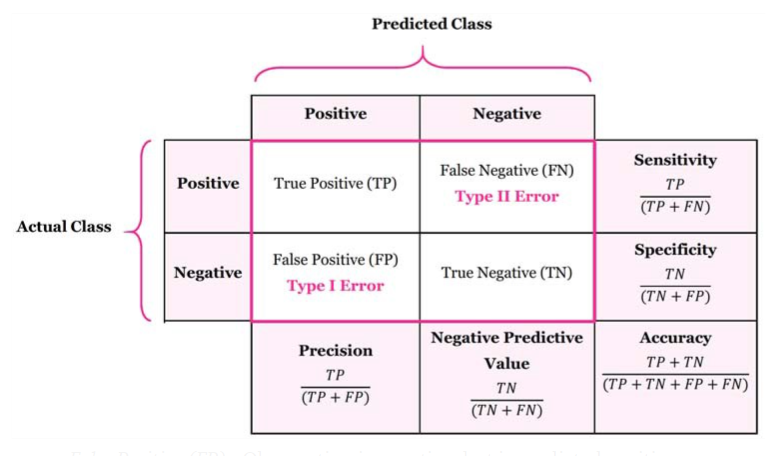

### ROC AUC Score

Receiver Operating Characteristic curve (ROC) is a graph demonstrating the performance of a model at different classification threshold <cite id="j2pes"><a href="#zotero|11753474/ADDDE5LQ">(<i>Classification</i>, n.d.)</a></cite>. The x-axis is False Positive Rate (FPS) and y-axis is True Positive Rate (TPS).
<ul>
    <li> ${FPR} = \frac{FP}{FP + TN}$ </li>
    <li> ${TPR} = \frac{TP}{TP + FN}$ </li>
</ul>
<p>Intuitively, if the threshold is set very low (for example, we only classify a message as spam even if we are 20% confident), most of actual spam message tends to be detected (High TP) while some of true ham messages may be misclassified (High FP) at the same time. Therefore, TPR and FPR are both increasing in this case and vice versa.</p>

Area under the ROC Curve (AUC) measures the two-dimensional area under the ROC curve ranging from (0, 0) to (1, 1). Larger AUC means the model is able to better distinguish between positive and negative class. A AUC of ROC curve is shown as below.

<img src=https://developers.google.com/machine-learning/crash-course/images/AUC.svg width="350">

However, there are two main drawbacks of AUC ROC. Firstly, AUC ROC tends not to be the best evaluation indicator for heavily imbalanced datasets as FPR is pulled down due to a large number of true negatives. Secondly, it does not perform well when we care about TN and TP differently. Nevertheless, we will still use AUC ROC score in the evaluation part as a reference and comparison with other scores.

### Model Training and Prediction Runtime

As mentioned before in Problem Area, we need to have an efficient algorithm to detect spam due to the limits of computational resources in mobile phones <cite id="5xcha"><a href="#zotero|11753474/4YR5RNFD">(Liu et al., 2021)</a></cite>. Therefore, built-in <code>time</code> module in Python is used to record the running time of each machine learning model's training and prediction process.

# Implementation <a class="anchor" id="implementation"></a>

## Preprocessing <a class="anchor" id="preprocessing"></a>

We have already loaded the csv data as a dataframe in the "Description of Dataset" section. We will start to do data cleaning and string vectorization to make the data ready to be trained through different machine learning models later.

### Data Cleaning

Redundant columns are removed and we rename <code>v1</code> column to be <code>label</code> and <code>v2</code> column to be <code>text</code>.

In [161]:
# Drop redundant columns and rename v1 to label and v2 to text
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


There are 403 duplicated rows in the dataframe, we also need to remove them.

In [163]:
df.duplicated().sum()

403

In [164]:
df = df.drop_duplicates(keep='first')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5169 non-null   object
 1   text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


After removing all duplicates, we have 5169 messages left in total.

### Explorative Data Analysis

#### Imblanced Dataset

The dataset is heavily imbalanced with Over 87% ham message and 13% spam message. As mentioned before, it may cause problems if we only use accuracy rate or AUC ROC as evaluation indicators.

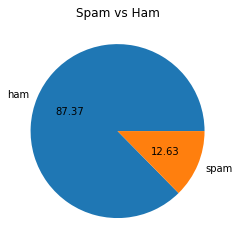

In [166]:
# Imbalanced dataset
plt.pie(df['label'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.title("Spam vs Ham")
plt.show()

#### Length Distributions

Next, the length distributions of ham and spam messages are further explored.

In [167]:
# For each row, the length of text is calculated
df['length'] = df['text'].apply(len)
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


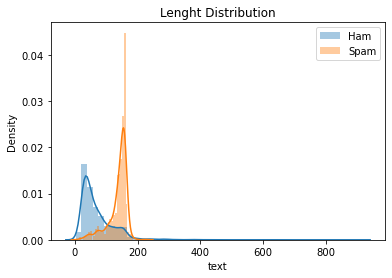

In [168]:
# Length distribution is plotted separately for ham and spam messages
s1 = df[df['label'] == 'ham']['text'].str.len()
sns.distplot(s1, label='Ham')
s2 = df[df['label'] == 'spam']['text'].str.len()
sns.distplot(s2, label='Spam')
plt.title('Lenght Distribution')
plt.legend()

In [169]:
print(f"The average length of ham message is {s1.mean():.2f}\nThe average length of spam message is {s2.mean():.2f}")

The average length of ham message is 70.46
The average length of spam message is 137.89


We can see from the graph and average length of ham and spam messages that spam tends to have longer length compared to ham messages.

#### Word Cloud

Besides quantitative difference, we would like to get a sense of qualitative difference between spam and ham messages by creating word cloud for spam and ham messages.

In [170]:
df_spam = df[df['label']=='spam'] # separate spam message out as a single dataframe to make the word cloud
spam_list= df_spam['text'].tolist()
filtered_spam = ' '.join(spam_list).lower()

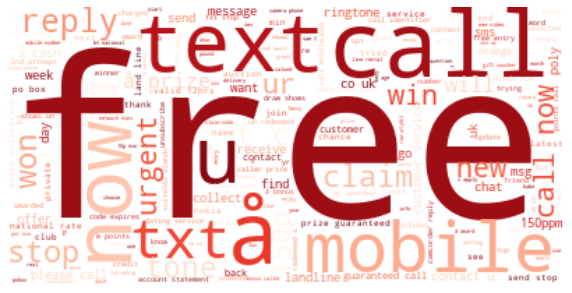

In [171]:
wordcloud_spam = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_spam)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [172]:
df_ham = df[df['label']=='ham'] # separate ham message out as a single dataframe to make the word cloud
ham_list = df_ham['text'].tolist()
filtered_ham = ' '.join(ham_list).lower()

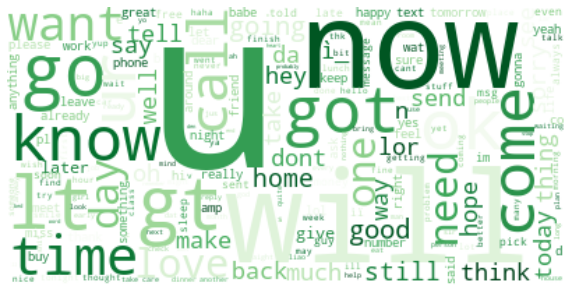

In [173]:
wordcloud_ham = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_ham)
plt.figure(figsize = (10,6))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis("off")
plt.show()

We can easily see from word clouds above, spam messages (red) tends to contain more fraudulent words like 'free', 'cash', 'prize', 'won'. On the contrary, ham messages (green) are quite different and they contain more information regarding with time and actions.<br><br>
Overall, the distinctive quantitative and qualitative differences can be helpful to train classifiers and enable them to better predict spam and ham messages.

### Text Normalization

The purpose of text normalization is to reduce noises and randomness, making texts to be more <u>"standard"</u>, which can further help to reduce the amount of unimportant information that the model needs to deal with. Text normalization in this project includes several steps <cite id="vyy9y"><a href="#zotero|11753474/UQ6DK5LK">(Yse, 2021)</a></cite>:
<ol>
    <li> <strong>Tokenization</strong>: It is the process of breaking text into a list of words. It converts a messy string into pieces called tokens and makes it more convenient to do further processing. </li>
    <li> <strong>Lowercase</strong>: We do not differentiate uppercase and lowercase letters, hence we transform all letters into lowercase.
    <li> <strong>Remove punctuation</strong>: Punctuation contains few amount of information such as comma and period, hence removing them can help models focus on more important information to detect spams. </li>
    <li> <strong>Remove stop words</strong>: Stop words also contain few amount of information such as 'the', 'a', 'is' and so on. </li>
    <li> <strong>Stemming</strong>: Stemming is the process of transforming the words into their word stem or root form. For example, the past tense of 'go' is 'went' but they have same meanings. Hence, transforming words into their root form can help models to group these words in different tenses and formats together and predict more accurately.</li>
</ol>

The whole text normalization process is packaged in a <code>text_normalization</code> function which will passed to the <code>analyzer</code> arguments in vectorizers in following sections.

In [174]:
def text_normalization(text):
    text = word_tokenize(text)
    text = [t.lower() for t in text]
    text = [t for t in text if t not in string.punctuation]
    text = [t for t in text if t not in stopwords.words('english')]
    st = Stemmer()
    text = [st.stem(t) for t in text]
    return text

For a more concrete example, an example text is given as below. After transformation, we can see all "unimportant" words such as punctuation and stop words are removed and important words are reserved in their stemming manner.

In [175]:
text_test = '''Good muffins cost $3.88\nin New York.  Could you please buy me
... TWO of them?\n\nThanks.'''
text_normalization(text_test)

['good',
 'muffin',
 'cost',
 '3.88',
 'new',
 'york',
 'could',
 'pleas',
 'buy',
 'two',
 'thank']

In [176]:
df['label'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

In order to make data ready for model training, 'spam' and 'ham' labels are transformed to integers 1 and 0.

### Word Embeddings

In order to translate human words into something computers can naturally understand, we need to encode texts into a certain numeric form so that we can apply mathematical rules and conduct matrix operation to them and make it easier for machine learning models to learn their patterns <cite id="7q1pt"><a href="#zotero|11753474/I6Y8JLAZ">(Heidenreich, 2018)</a></cite>.

#### Count Vectorization

<p>Count vectorization is one of the most basic and intuitive ways to encode texts. A vector is created with as many dimensions as the corpora's unique words. Each unique word represents a column and each text or document represents a row. The number in a specific cell represents the frequency of the word in the text or document.</p>
Below is an example of count vectorization:

In [177]:
# An example of count vectorization
text = ['hello you can call me DAVID', 
        'HELLO my name is, Judy!']
count_vect = CountVectorizer(analyzer=text_normalization)
count_matrix = count_vect.fit_transform(text)
count_array = count_matrix.toarray()
df_cv = pd.DataFrame(data=count_array, columns = count_vect.get_feature_names())
df_cv

,call,david,hello,judi,name
0,1,1,1,0,0
1,0,0,1,1,1


As we can see from above <code>df_cv</code>, with customized <code>analyzer=text_normalization</code>, we can filter out unimportant stop words and punctuation and reduce words to their roots, making the count vector more compact and efficient.

In [178]:
cv = CountVectorizer(analyzer=text_normalization)
X_cv = cv.fit_transform(df['text'])
x_train_cv, x_test_cv, y_train, y_test = train_test_split(X_cv, df['label'], test_size=0.3, random_state = 0)

We further apply the count vectorizing operation to all spam and ham texts and split training and test data (70% training | 30% test).

#### TFIDF Vectorizer

<p>Term Frequency - Inverse Document Frequency (TF-IDF) uses certain calculations to give less weights to less important words that appear everywhere while give more weights to more important and unique words in certain document, in addition to taking word frequency into consideration like the count vectorizer.</p>

The formula of TF-IDF is shown as below <cite id="9m4dh"><a href="#zotero|11753474/C2LYPKPJ">(Saket, Sheel, 2020)</a></cite>:

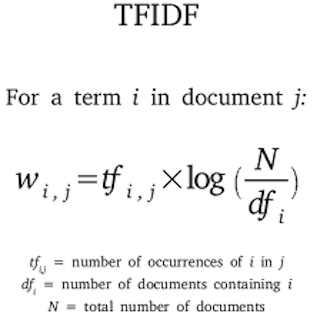

'tf' means the number of occurrences of term i in document j which is the same measure as count vectorizer. What different is the 'df' part, which gives less weights to a word appearing everywhere in different documents.

We implement TFIDF vectorizing operation to all messages and split training and test data (70% training 30% test)

In [179]:
tfidf = TfidfVectorizer(analyzer=text_normalization)
X_tfidf = tfidf.fit_transform(df['text'])
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.3, random_state = 0)

Below is a example of TFIDF vectorization of a random message in the dataframe.

In [180]:
mess = df.iloc[5]['text']
sample = tfidf.transform([mess]).toarray()[0]
print('index\tidf\ttfidf\tterm')
for i in range(len(sample)):
    if sample[i] != 0:
        print(i, format(tfidf.idf_[i], '.4f'), format(sample[i], '.4f'), tfidf.get_feature_names()[i],sep='\t')

index	idf	tfidf	term
5	6.2925	0.2250	'd
22	3.5009	0.2503	's
633	5.3917	0.1928	3
1551	4.5948	0.1643	back
2116	8.4520	0.3022	chg
2470	7.4712	0.2671	darl
3263	6.8426	0.2446	freemsg
3312	6.1166	0.2187	fun
3691	4.8872	0.1747	hey
4387	4.1213	0.1473	like
5172	4.1082	0.1469	ok
5810	8.4520	0.3022	rcv
6175	4.3858	0.1568	send
6597	7.6047	0.2719	std
6618	4.5670	0.1633	still
6849	7.9412	0.2839	tb
7529	4.8778	0.1744	week
7675	5.6386	0.2016	word
7796	6.2925	0.2250	xxx
7912	6.8426	0.2446	å£1.50


## Baseline Performance <a class="anchor" id="baseline_performance"></a>

Before introducing the baseline model in details, I would like to set up some standard functions for later model tuning and training.

In [181]:
# make runtime print in red
def colored(r, g, b, text):
    return "\033[38;2;{};{};{}m{} \033[38;2;255;255;255m".format(r, g, b, text)

In [2]:
# time_func as a decorator of model_train_predict function to record runtime of the function every time it is called
def timer_func(func):
    def wrap_func(*args, **kwargs):
        t1 = time.time()
        result = func(*args, **kwargs)
        t2 = time.time()
        print(colored(255, 0, 0, f'Function {func.__name__!r} executed in {(t2-t1):.4f}s'))
        return result
    return wrap_func

<p><code>get_optimal_params</code> and <code>model_train_predict</code> are the two most important functions in this project in order to standardize the machine learning model tuning and training process. Firstly, for each model, we try to fine tune their hyperparameters using <code>GridSearchCV</code> function. After picking the model with optimal parameters, we will fit the model with training data and predict test data, during which we will record runtime of model training and prediction which is a dimension of measurement for model performance.</p>
For each model, count vectorized and TFIDF vectorized training and test data will be experimented separately to see which vectorization method is more suitable for the model.

In [183]:
def get_optimal_params(x_train, y_train, param_grid, model):
    grid_model = GridSearchCV(model, param_grid, cv=5, verbose=1)
    grid_model.fit(x_train, y_train)
    print("Tuned hpyerparameters :(best parameters) ", grid_model.best_params_)
    print("Accuracy :", grid_model.best_score_)
    return grid_model.best_params_

@timer_func
def model_train_predict(x_train, y_train, x_test, params, model):
    model = model(**params).fit(x_train, y_train)
    # prediction
    y_pred = model.predict(x_test)
    end = time.time()
    
    return y_pred, model

I also created an <code>evaluate</code> function that will be called later for evaluation purpose.

In [184]:
def evaluate(y_pred, y_test):
    print(classification_report(y_test, y_pred))
    print('------------Confusion matrix------------')
    print(confusion_matrix(y_test, y_pred))

### K Nearest Neighbors Classification (KNN)

Intuitively, KNN algorithm takes K nearest data points and classify the new data point for which the number of neighbors is maximum. It can be specifically divided into several steps <cite id="08rea"><a href="#zotero|11753474/NATMXKTJ">(Christopher, 2021)</a></cite>:
<ol>
    <li> Select the number of neighbors K </li>
    <li> Calculate the distance of between K number of neighbors and the target value (can be Euclidean, Manhattan and etc.) </li>
    <li> Take the K nearest neighbors based on the calculated distance </li>
    <li> Assign the new data points to that category for which the number of neighbors is maximum</li>

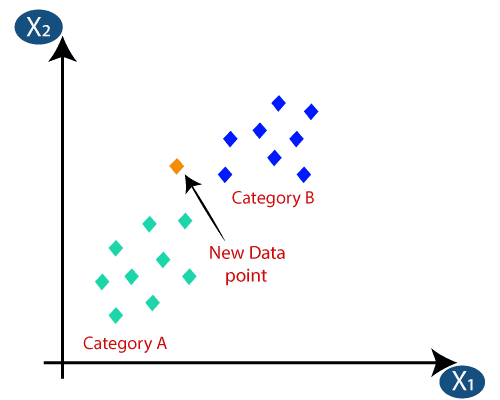

The reason why I chose KNN classifier as the baseline model is that KNN classification tends to be the least efficient and effective models among all models mentioned in this project. Firstly and most importantly, KNN suffers from curse of dimensionality because for high dimensional data, their distance tends to be very concentrated and difficult to split them up as shown in the following pictures <cite id="1kinn"><a href="#zotero|11753474/E2FCBSAD">(Joby, 2021)</a></cite>. For both count vectorization and TFIDF vectorization, they will create very high dimensional matrices depending on how many unique words in a certain text. It will create much noise for KNN algorithm to classify spam and ham correctly. Secondly, redundancy and irrelevancy may harm KNN accuracy as well as it takes all training data as predictors without any filtration. Thirdly, because KNN needs to calculate distance between all training points and the target point, it tends to be inefficient and takes more time to do predictions.

<img src=https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/c2/cursefigure.png width="800">

#### Count Vectorizer

In [185]:
KNN_param_grid = {"n_neighbors": [5, 10, 30, 50, 100]}
KNN_params_cv = get_optimal_params(x_train_cv, y_train, KNN_param_grid, KNeighborsClassifier())
KNN_y_pred_cv, KNN_cv = model_train_predict(x_train_cv, y_train, x_test_cv, KNN_params_cv, KNeighborsClassifier)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuned hpyerparameters :(best parameters)  {'n_neighbors': 5}
Accuracy : 0.9024319326318363
Function 'model_train_predict' executed in 0.1775s 


In [186]:
evaluate(KNN_y_pred_cv, y_test)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1342
           1       1.00      0.21      0.35       209

    accuracy                           0.89      1551
   macro avg       0.95      0.61      0.64      1551
weighted avg       0.91      0.89      0.86      1551

------------Confusion matrix------------
[[1342    0]
 [ 165   44]]


#### TFIDF Vectorizer

In [187]:
KNN_params_tfidf = get_optimal_params(x_train_tfidf, y_train, KNN_param_grid, KNeighborsClassifier())
KNN_y_pred_tfidf, KNN_tdidf = model_train_predict(x_train_tfidf, y_train, x_test_tfidf, KNN_params_tfidf, KNeighborsClassifier)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuned hpyerparameters :(best parameters)  {'n_neighbors': 10}
Accuracy : 0.9353232005991
Function 'model_train_predict' executed in 0.1820s 


In [188]:
evaluate(KNN_y_pred_tfidf, y_test)

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1342
           1       1.00      0.40      0.57       209

    accuracy                           0.92      1551
   macro avg       0.96      0.70      0.76      1551
weighted avg       0.93      0.92      0.90      1551

------------Confusion matrix------------
[[1342    0]
 [ 125   84]]


<p>As we can see from the results above, KNN classification indeed has very poor results, especially for recall, which means there a lots of False Negatives. The algorithm fails to detect most of actual spams. In terms of accuracy, it just performs a bit better than predicting all messages as ham. For example, if we predict all messages as ham, we can get 87% accuracy rate while KNN using count vectorizer has 89% accuracy and using TFIDF vectorizer has 92% accuracy rate. TFIDF vectorizer outperforms count vectorizer in this case is because TFIDF vectorizer tends to reduce dimensionality and helps KNN algorithm to filter out noises. </p>

The runtime of less than 0.5 seconds is relatively fast. We may come a more comprehensive conclusion after comparing with other classification approaches in next section.

## Classification Approaches <a class="anchor" id="classification_approaches"></a>

Five different classification approaches are experimented to classify spam and ham messages which are Naive Bayes Classifier (NB), Logistic Regression (LR), Support Vector Machine (SVM), Gradient Boosting Classfier (GBC) and XGBoost Classfier (XGB). The rationale of selecting these five models is that we need to balance the efficiency and the complexity of the model. NB and LR should be simple models that take less time to train and predict while SVM tends to be a bit complex. GBC and XGB are two kinds of Gradient Boosting algorithm that combines multiple weak learners to build a stronger machine learning model. Hence, the difficulty to train these five models should be increasing and we will see which one to choose based on the evaluation of their performance in terms of confusion matrices and different scores as well as runtime.

### Naive Bayes Classifier (NB)

Naive Bayes Classifier is a classification technique based on Bayes' Theorem. However, it is naive because Bayes' Theorem is applied on the assumption of independence among all features, which can simplify all calculations, but at the same time may lose correlations between different words. The formula is shown as below <cite id="2w7mp"><a href="#zotero|11753474/I3JU7YFA">(Ray, 2017)</a></cite>.

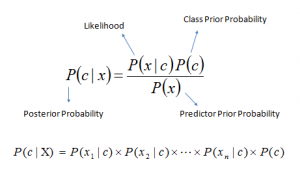

#### <u>Count Vectorizer</u>

In [189]:
NB_param_grid = {"alpha": np.linspace(0,5,21), "fit_prior": [True, False]}
NB_params_cv = get_optimal_params(x_train_cv, y_train, NB_param_grid, MultinomialNB())
NB_y_pred_cv, NB_cv = model_train_predict(x_train_cv, y_train, x_test_cv, NB_params_cv, MultinomialNB)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Tuned hpyerparameters :(best parameters)  {'alpha': 2.0, 'fit_prior': True}
Accuracy : 0.9798231738535721
Function 'model_train_predict' executed in 0.0020s 


In [190]:
evaluate(NB_y_pred_cv, y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1342
           1       0.97      0.85      0.91       209

    accuracy                           0.98      1551
   macro avg       0.98      0.92      0.95      1551
weighted avg       0.98      0.98      0.98      1551

------------Confusion matrix------------
[[1337    5]
 [  31  178]]


#### <u>TFIDF Vectorizer</u>

In [191]:
NB_params_tfidf = get_optimal_params(x_train_tfidf, y_train, NB_param_grid, MultinomialNB())
NB_y_pred_tfidf, NB_tfidf = model_train_predict(x_train_tfidf, y_train, x_test_tfidf, NB_params_tfidf, MultinomialNB)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Tuned hpyerparameters :(best parameters)  {'alpha': 0.25, 'fit_prior': True}
Accuracy : 0.9776120828652866
Function 'model_train_predict' executed in 0.0029s 


In [192]:
evaluate(NB_y_pred_tfidf, y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1342
           1       0.97      0.86      0.91       209

    accuracy                           0.98      1551
   macro avg       0.97      0.93      0.95      1551
weighted avg       0.98      0.98      0.98      1551

------------Confusion matrix------------
[[1336    6]
 [  30  179]]


### Logistic Regression (LR)

Logistic regression is transformation of linear regression and the dependent variable is the probability of being in a certain class if it is a binary situation. As the dependent variable or the predicted value may exceed 0 and 1 range for linear regression, a sigmoid function is created to limit the value between 0 and 1 <cite id="h73kr"><a href="#zotero|11753474/KS2M8FJF">(Pant, 2019)</a></cite>.

<img src=https://miro.medium.com/max/640/1*OUOB_YF41M-O4GgZH_F2rw.png width="400">

#### <u>Count Vectorizer</u>

In [193]:
LR_param_grid = {"C":np.logspace(-3,3,7), "penalty":['l1', 'l2', 'elasticnet', 'none']}
LR_params_cv = get_optimal_params(x_train_cv, y_train, LR_param_grid, LogisticRegression())
LR_y_pred_cv, LR_cv = model_train_predict(x_train_cv, y_train, x_test_cv, LR_params_cv, LogisticRegression)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'none'}
Accuracy : 0.9792729801395353
Function 'model_train_predict' executed in 0.0588s 


In [194]:
evaluate(LR_y_pred_cv, y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1342
           1       0.99      0.85      0.91       209

    accuracy                           0.98      1551
   macro avg       0.98      0.92      0.95      1551
weighted avg       0.98      0.98      0.98      1551

------------Confusion matrix------------
[[1340    2]
 [  32  177]]


#### <u>TFIDF Vectorizer</u>

In [195]:
LR_params_tfidf = get_optimal_params(x_train_tfidf, y_train, LR_param_grid, LogisticRegression())
LR_y_pred_tfidf, LR_tfidf = model_train_predict(x_train_tfidf, y_train, x_test_tfidf, LR_params_tfidf, LogisticRegression)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'none'}
Accuracy : 0.9781664794479724
Function 'model_train_predict' executed in 0.0810s 


In [196]:
evaluate(LR_y_pred_tfidf, y_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1342
           1       0.94      0.86      0.90       209

    accuracy                           0.97      1551
   macro avg       0.96      0.93      0.94      1551
weighted avg       0.97      0.97      0.97      1551

------------Confusion matrix------------
[[1331   11]
 [  29  180]]


### Support Vector Machine (SVM)

The objective of Support Vector Machine is to find a hyperplane in an N-dimensional space that distinctly classifies the data points, where N is the number of features. Since there are many possible hyperplanes that can be chosen, the more specific goal is to find a plane with the maximum margin (i.e. the maximum distance between data points of both classes) <cite id="79r2p"><a href="#zotero|11753474/AJMLQL9F">(Gandhi, 2018)</a></cite>. 

<img src=https://miro.medium.com/max/600/0*0o8xIA4k3gXUDCFU.png width="300">

#### <u>Count Vectorizer</u>

In [197]:
SVM_param_grid = {'C': [1, 10], 'kernel': ['poly', 'rbf', 'sigmoid','linear']}
SVM_params_cv = get_optimal_params(x_train_cv, y_train, SVM_param_grid, SVC())
SVM_y_pred_cv, SVM_cv = model_train_predict(x_train_cv, y_train, x_test_cv, SVM_params_cv, SVC)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Tuned hpyerparameters :(best parameters)  {'C': 1, 'kernel': 'linear'}
Accuracy : 0.9781664794479724
Function 'model_train_predict' executed in 0.3351s 


In [198]:
evaluate(SVM_y_pred_cv, y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1342
           1       0.99      0.85      0.92       209

    accuracy                           0.98      1551
   macro avg       0.99      0.93      0.95      1551
weighted avg       0.98      0.98      0.98      1551

------------Confusion matrix------------
[[1341    1]
 [  31  178]]


#### <u>TFIDF Vectorizer</u>

In [199]:
SVM_params_tfidf = get_optimal_params(x_train_tfidf, y_train, SVM_param_grid, SVC())
SVM_y_pred_tfidf, SVM_tfidf = model_train_predict(x_train_tfidf, y_train, x_test_tfidf, SVM_params_tfidf, SVC)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Tuned hpyerparameters :(best parameters)  {'C': 10, 'kernel': 'linear'}
Accuracy : 0.9754032843508096
Function 'model_train_predict' executed in 0.4592s 


In [200]:
evaluate(SVM_y_pred_tfidf, y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1342
           1       0.99      0.85      0.92       209

    accuracy                           0.98      1551
   macro avg       0.98      0.93      0.95      1551
weighted avg       0.98      0.98      0.98      1551

------------Confusion matrix------------
[[1340    2]
 [  31  178]]


---
Next, we will use two algorithms under the family of boosting classification - Gradient Boosting Classifier and XGBoosting Classifier. Boosting is a method of converting weak learners (decision tree) into strong learners. More specifically, after evaluating the first tree, we increase the weights of observations that are difficult to classify with large errors and lower the weights of observations that are easy to classify with small errors. The rationale behind this kind of algorithm is that instances which are hard to predict correctly will be focused on during learning so that the model can fix past mistakes <cite id="5alcm"><a href="#zotero|11753474/CDJZUXCS">(Singh, 2018)</a></cite>.

### Gradient Boosting Classifier (GBC)

The gradient is used to minimize a loss function which is the distance between prediction and actual values. The gradient means the partial derivative of loss function and can be used to find the direction which can reduce the error most in the next round of training <cite id="6g0w6"><a href="#zotero|11753474/RTXLRZRY">(Elsinghorst, 2018)</a></cite>.

#### <u>Count Vectorizer</u>

In [201]:
GBC_param_grid = {'learning_rate': [0.5, 1], 'random_state': [0]}
GBC_params_cv = get_optimal_params(x_train_cv, y_train, GBC_param_grid, GradientBoostingClassifier())
GBC_y_pred_cv, GBC_cv = model_train_predict(x_train_cv, y_train, x_test_cv, GBC_params_cv, GradientBoostingClassifier)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Tuned hpyerparameters :(best parameters)  {'learning_rate': 0.5, 'random_state': 0}
Accuracy : 0.963517571811742
Function 'model_train_predict' executed in 3.1375s 


In [202]:
evaluate(GBC_y_pred_cv, y_test)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1342
           1       0.97      0.79      0.87       209

    accuracy                           0.97      1551
   macro avg       0.97      0.90      0.93      1551
weighted avg       0.97      0.97      0.97      1551

------------Confusion matrix------------
[[1337    5]
 [  43  166]]


#### <u>TFIDF Vectorizer</u>

In [203]:
GBC_params_tfidf = get_optimal_params(x_train_tfidf, y_train, GBC_param_grid, GradientBoostingClassifier())
GBC_y_pred_tfidf, GBC_tfidf = model_train_predict(x_train_tfidf, y_train, x_test_tfidf, GBC_params_tfidf, GradientBoostingClassifier)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Tuned hpyerparameters :(best parameters)  {'learning_rate': 0.5, 'random_state': 0}
Accuracy : 0.9604777515416887
Function 'model_train_predict' executed in 3.9409s 


In [204]:
evaluate(GBC_y_pred_tfidf, y_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1342
           1       0.96      0.79      0.87       209

    accuracy                           0.97      1551
   macro avg       0.96      0.89      0.93      1551
weighted avg       0.97      0.97      0.97      1551

------------Confusion matrix------------
[[1335    7]
 [  43  166]]


### XGBoost Classifier (XGB)

XGBoost represents Extreme Gradient Boosting, which is a specific implementation of the Gradient Boosting method (GBC) and usually outperforms GBC. It has advantages in three aspects <cite id="wutd8"><a href="#zotero|11753474/RTXLRZRY">(Elsinghorst, 2018)</a></cite>:
<ol>
    <li> Training is faster and can be parallelized across clusters.</li>
    <li> It computes second-order gradients which provides more precise information about the direction of gradients and how to achieve minimum point of the loss function.</li>
    <li> It uses advanced regularization (L1 and L2) which helps to prevent overfitting and improve model generalization.</li>
</ol>

#### <u>Count Vectorizer</u>

In [205]:
XGB_param_grid = {'eta': [0.01, 0.02], 'max_depth': [5,6], 'random_state': [0], 'verbosity': [0]}
XGB_params_cv = get_optimal_params(x_train_cv, y_train, XGB_param_grid, xgb.XGBClassifier())
XGB_y_pred_cv, XGB_cv = model_train_predict(x_train_cv, y_train, x_test_cv, XGB_params_cv, xgb.XGBClassifier)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Tuned hpyerparameters :(best parameters)  {'eta': 0.02, 'max_depth': 6, 'random_state': 0, 'verbosity': 0}
Accuracy : 0.9485893644498444
Function 'model_train_predict' executed in 0.4560s 


In [206]:
evaluate(XGB_y_pred_cv, y_test)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.95      0.66      0.78       209

    accuracy                           0.95      1551
   macro avg       0.95      0.83      0.88      1551
weighted avg       0.95      0.95      0.95      1551

------------Confusion matrix------------
[[1335    7]
 [  71  138]]


#### <u>TFIDF Vectorizer</u>

In [207]:
XGB_params_tfidf = get_optimal_params(x_train_tfidf, y_train, XGB_param_grid, xgb.XGBClassifier())
XGB_y_pred_tfidf, XGB_tfidf = model_train_predict(x_train_tfidf, y_train, x_test_tfidf, XGB_params_tfidf, xgb.XGBClassifier)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Tuned hpyerparameters :(best parameters)  {'eta': 0.02, 'max_depth': 6, 'random_state': 0, 'verbosity': 0}
Accuracy : 0.9499755469460428
Function 'model_train_predict' executed in 0.7750s 


In [208]:
evaluate(XGB_y_pred_tfidf, y_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1342
           1       0.89      0.73      0.80       209

    accuracy                           0.95      1551
   macro avg       0.92      0.86      0.89      1551
weighted avg       0.95      0.95      0.95      1551

------------Confusion matrix------------
[[1323   19]
 [  56  153]]


# Conclusions <a class="anchor" id="conclusions"></a>

## Evaluation <a class="anchor" id="evaluation"></a>

<p>In this part, confusion matrices are visualized and relevant scores including accuracy rate, precision, recall,  F1 score and AUC ROC score are computed for both count vectorizer and TFIDF vectorizer. Moreover, runtime of model training and prediction are recorded manually (The runtime may be printed differently if you re-run the script as it depends on the computational power of your local machine).</p>
Two dataframes for count vectorizer and TFIDF vectorizer respectively are shown at the end of this part. They contain all metrics for six models including the baseline model.

In [209]:
def plot_confusion_matrix_customized(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
                cmap="Blues", cbar=False)
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [210]:
def plot_all_confusion_matrices(y_true, dict_all_pred, str_title):
    list_classifiers = list(dict_all_pred.keys())
    plt.figure(figsize=(10,7.5))
    plt.suptitle(str_title, fontsize=20, fontweight='bold')
    n=231

    for clf in list_classifiers: 
        plt.subplot(n)
        plot_confusion_matrix_customized(y_true, dict_all_pred[clf])
        plt.title(clf, fontweight='bold')
        n+=1

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

### Count Vectorizer

#### Confusion Matrices

In [211]:
list_clf = ["KNN", "NB", "LR", "SVM", "GBC", "XGB"]

list_pred = [KNN_y_pred_cv, NB_y_pred_cv, LR_y_pred_cv,
             SVM_y_pred_cv, GBC_y_pred_cv, XGB_y_pred_cv]

dict_pred = dict(zip(list_clf, list_pred))

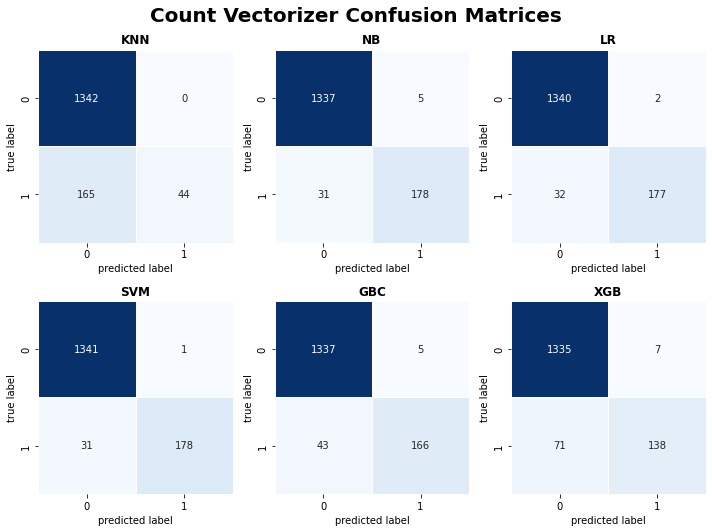

In [212]:
plot_all_confusion_matrices(y_test, dict_pred, "Count Vectorizer Confusion Matrices")

#### Scores Comparison

In [213]:
column_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score', 'Runtime'] 
df_evaluation_cv = pd.DataFrame(columns = column_names)
df_evaluation_cv['Model'] = list_clf
df_evaluation_cv = df_evaluation_cv.set_index('Model')

In [214]:
def print_and_save_scores(score_func, score_name, df, average=None):
    score_lst = []
    for clf in list_clf:
        if average:
            score = score_func(y_test, dict_pred[clf], average=average)
        else:
            score = score_func(y_test, dict_pred[clf])
        score_lst.append([clf, score])
        df.at[clf, score_name] = score
    score_lst.sort(key=lambda x:x[1], reverse=True)
    for clf, score in score_lst:
        print(f"{clf}: {score}")

In [215]:
print("---Count Vectorizer | Accuracy Score---")
print_and_save_scores(accuracy_score, 'Accuracy', df_evaluation_cv)

---Count Vectorizer | Accuracy Score---
SVM: 0.9793681495809156
LR: 0.9780786589297228
NB: 0.97678916827853
GBC: 0.9690522243713733
XGB: 0.9497098646034816
KNN: 0.8936170212765957


In [216]:
print("---Count Vectorizer | Precision Score---")
print_and_save_scores(precision_score, 'Precision', df_evaluation_cv, 'binary')

---Count Vectorizer | Precision Score---
KNN: 1.0
SVM: 0.994413407821229
LR: 0.9888268156424581
NB: 0.9726775956284153
GBC: 0.9707602339181286
XGB: 0.9517241379310345


In [217]:
print("---Count Vectorizer | Recall Score---")
print_and_save_scores(recall_score, 'Recall', df_evaluation_cv, 'binary')

---Count Vectorizer | Recall Score---
NB: 0.8516746411483254
SVM: 0.8516746411483254
LR: 0.84688995215311
GBC: 0.7942583732057417
XGB: 0.6602870813397129
KNN: 0.21052631578947367


In [218]:
print("---Count Vectorizer | F1 Score---")
print_and_save_scores(f1_score, 'F1 Score', df_evaluation_cv, 'binary')

---Count Vectorizer | F1 Score---
SVM: 0.9175257731958762
LR: 0.9123711340206185
NB: 0.9081632653061223
GBC: 0.8736842105263158
XGB: 0.7796610169491526
KNN: 0.34782608695652173


In [219]:
print("---Count Vectorizer | ROC AUC Score---")
print_and_save_scores(roc_auc_score, 'ROC AUC Score', df_evaluation_cv)

---Count Vectorizer | ROC AUC Score---
SVM: 0.925464742332732
NB: 0.9239744293670092
LR: 0.9226998195936937
GBC: 0.8952662953957173
XGB: 0.8275354929798416
KNN: 0.6052631578947368


### TFIDF Vectorizer

In [220]:
list_clf = ["KNN", "NB", "LR", "SVM", "GBC", "XGB"]

list_pred = [KNN_y_pred_tfidf, NB_y_pred_tfidf, LR_y_pred_tfidf,
             SVM_y_pred_tfidf, GBC_y_pred_tfidf, XGB_y_pred_tfidf]

dict_pred = dict(zip(list_clf, list_pred))

#### Confusion Matrices

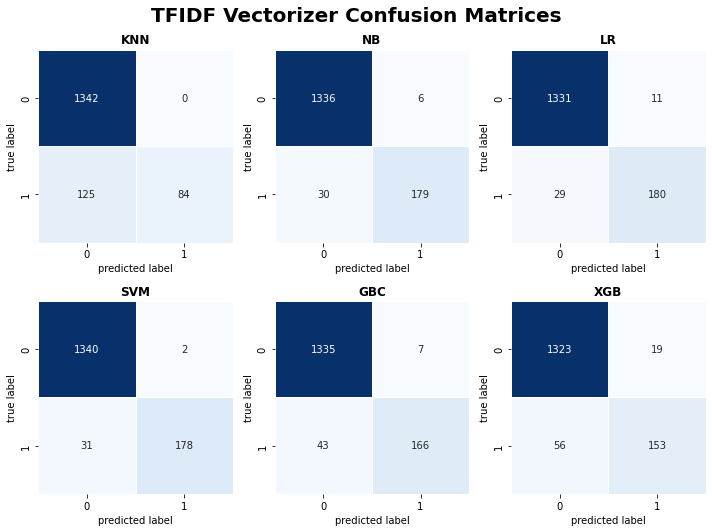

In [221]:
plot_all_confusion_matrices(y_test, dict_pred, "TFIDF Vectorizer Confusion Matrices")

#### Scores Comparison

In [222]:
column_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score', 'Runtime'] 
df_evaluation_tfidf = pd.DataFrame(columns = column_names)
df_evaluation_tfidf['Model'] = list_clf
df_evaluation_tfidf = df_evaluation_tfidf.set_index('Model')

In [223]:
print("---TFIDF Vectorizer | Accuracy Score---")
print_and_save_scores(accuracy_score, 'Accuracy', df_evaluation_tfidf)

---TFIDF Vectorizer | Accuracy Score---
SVM: 0.9787234042553191
NB: 0.97678916827853
LR: 0.9742101869761445
GBC: 0.9677627337201805
XGB: 0.9516441005802708
KNN: 0.9194068343004513


In [224]:
print("---TFIDF Vectorizer | Precision Score---")
print_and_save_scores(precision_score, 'Precision', df_evaluation_tfidf, 'binary')

---TFIDF Vectorizer | Precision Score---
KNN: 1.0
SVM: 0.9888888888888889
NB: 0.9675675675675676
GBC: 0.9595375722543352
LR: 0.9424083769633508
XGB: 0.8895348837209303


In [225]:
print("---TFIDF Vectorizer | Recall Score---")
print_and_save_scores(recall_score, 'Recall', df_evaluation_tfidf, 'binary')

---TFIDF Vectorizer | Recall Score---
LR: 0.861244019138756
NB: 0.8564593301435407
SVM: 0.8516746411483254
GBC: 0.7942583732057417
XGB: 0.7320574162679426
KNN: 0.4019138755980861


In [226]:
print("---TFIDF Vectorizer | F1 Score---")
print_and_save_scores(f1_score, 'F1 Score', df_evaluation_tfidf, 'binary')

---TFIDF Vectorizer | F1 Score---
SVM: 0.9151670951156812
NB: 0.9086294416243655
LR: 0.9000000000000001
GBC: 0.8691099476439791
XGB: 0.8031496062992126
KNN: 0.5733788395904437


In [227]:
print("---TFIDF Vectorizer | ROC AUC Score---")
print_and_save_scores(roc_auc_score, 'ROC AUC Score', df_evaluation_tfidf)

---TFIDF Vectorizer | ROC AUC Score---
LR: 0.9265236489136404
NB: 0.9259941956231861
SVM: 0.9250921640913013
GBC: 0.8945211389128559
XGB: 0.858949721546788
KNN: 0.700956937799043


### Summarized Dataframes

In [232]:
runtime_dict_cv = {'KNN': 0.1775, 'NB': 0.002, 'LR': 0.0588, 'SVM': 0.3351, 'GBC': 3.1375, 'XGB': 0.4560}
for model, time in runtime_dict_cv.items():
    df_evaluation_cv.at[model, 'Runtime'] = time

In [233]:
runtime_dict_tfidf = {'KNN': 0.1820, 'NB': 0.0029, 'LR': 0.0810, 'SVM': 0.4592, 'GBC': 3.9409, 'XGB': 0.7750}
for model, time in runtime_dict_tfidf.items():
    df_evaluation_tfidf.at[model, 'Runtime'] = time

In [234]:
df_evaluation_cv

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Runtime
Model,,,,,,
KNN,0.893617,1.0,0.210526,0.347826,0.605263,0.1775
NB,0.976789,0.972678,0.851675,0.908163,0.923974,0.002
LR,0.978079,0.988827,0.84689,0.912371,0.9227,0.0588
SVM,0.979368,0.994413,0.851675,0.917526,0.925465,0.3351
GBC,0.969052,0.97076,0.794258,0.873684,0.895266,3.1375
XGB,0.94971,0.951724,0.660287,0.779661,0.827535,0.456


In [235]:
df_evaluation_tfidf

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Runtime
Model,,,,,,
KNN,0.919407,1.0,0.401914,0.573379,0.700957,0.182
NB,0.976789,0.967568,0.856459,0.908629,0.925994,0.0029
LR,0.97421,0.942408,0.861244,0.9,0.926524,0.081
SVM,0.978723,0.988889,0.851675,0.915167,0.925092,0.4592
GBC,0.967763,0.959538,0.794258,0.86911,0.894521,3.9409
XGB,0.951644,0.889535,0.732057,0.80315,0.85895,0.775


<p>As we can see from above dataframes for count vectorizer and TDIDF vectorizer respectively, there is no significant difference of model performance between these two vectorizing operation except for the baseline model KNN due to the "curse of dimensionality" mentioned in the previous section. We can see clearly that all five models experimented outperform the baseline model KNN.</p>

<p>For those classical machine learning methods (non-boosting), as the hypothesis raised before, the runtime increases as the complexity of the model increases (NB < LR < SVM). Their accuracy rates are all above 97% while SVM outperforms a little bit. Moreover, SVM has highest F1 score and nearly highest ROC AUC score for both count vectorizer and TFIDF vectorizer. SVM also outperforms in precision. Therefore, if we would like to build a spam classifier that does not want users to miss true messages, SVM is the optimal model among these three in terms of precision. Overall, SVM outperforms NB and LR in nearly all metrics except for runtime. Hence, if we have a computationally powerful smart phone, it is better to deploy SVM using count vectorizer while if the computational power is the bottleneck, NB may be a better choice as its performance is similar to LR, but with a much shorter runtime.</p>

<p>For boosting machine learning methods which are GBC and XGB, we can see GBC accuracy, precision, recall, F1 score and ROC AUC score are better than XGB, but the runtime seems to too long for GBC (5-7 times of XGB's runtime). It might be because GBC's learning rate is too small and XGB is faster with parallel processing. But if we adjust GBC learning rate to a larger number, its accuracy will be affected negatively. Hence, it is really a tradeoff between speed and accuracy. If comparing boosting methods with non-boosting ones, we can see that GBC and XGB underperform in all aspects compared to non-boosting methods. It may be because firstly, boosting methods are more complicated and require more computational resources. Secondly, I am not able to try many hyperparameters for GBC and XGB during the parameter tuning stage because there are many hyperparameters to fine tune and it takes too much time for the <code>GridCVSearch</code> algorithm to pick up the optimal ones.</p>

## Summary and Conclusions <a class="anchor" id="summary_and_conclusions"></a>

<p>SMS spam is becoming a more and more severe problem as the technology developments and the decreasing costs of sending spam messages. However, due to the limit of computational power of mobile phone and lack of databases of SMS spam messages, the development progress of SMS spam classifier is not satisfactory. This project aims to finding an effective and efficient algorithm to detect SMS spam while trying to make sure users not to miss their ham messages (i.e. maximize precision if other scores do not differ significantly). We also try to limit the model training and prediction time in a reasonable range.</p>

<p>KNN classifier is used as a baseline model, which performs a little better than predicting all messages as ham mainly due to the "curse of dimensionality". SVM using count vectorizer outperforms all other models regarding with different scores, especially precision. However, if computational resources is really the bottleneck, Naive Bayes classifier is preferred whose runtime is less than 0.01 seconds while SVM's runtime is around 0.5 seconds.</p>

<p>The proposed solution to the spam classification problem can be also transferable to other binary classification problems such as whether the patient has cancer and churn and conversion prediction for e-commerce. For those binary classification problems, we may need to use other normalization methods other than count vectorization and TFIDF vectorization for NLP. The measurement metrics may be different as their raw data may not be that heavily imbalanced and goal of optimization may be different.</p>

<p>The approach can be replicated by others using different programming language besides Python such as R and Java because all machine learning models used in this project are common where existing packages and modules of these machine learning models can be found in other programming languages.</p>

<p>Finally, there are many areas that can be improved for future study. Firstly, for boosting machine learning methods, due to time limit, we cannot try all kinds of combinations of hyperparameters, which may further improve the performance of GBC and XGB. Secondly, we only record the execution time of model training and prediction in my own laptop which may be quite different in mobile phones and different mobile phones may have different computational power. It is also a realistic aspect we need to consider in the future study. Thirdly, as it has been said "all models are wrong but some are useful", there are many other models that we did not experiment here such as deep learning, neural network and random forest. </p>

# Bibliography <a class="anchor" id="bibliography"></a>

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|11753474/NW9QSZP5"></i>Abhigyan. (2020, July 24). Calculating Accuracy of an ML Model. <i>Analytics Vidhya</i>. https://medium.com/analytics-vidhya/calculating-accuracy-of-an-ml-model-8ae7894802e</div>
  <div class="csl-entry"><i id="zotero|11753474/KHMGDERS"></i>Buckland, M., &#38; Gey, F. (1994). The relationship between recall and precision. <i>Journal of the American Society for Information Science</i>, <i>45</i>(1), 12–19.</div>
  <div class="csl-entry"><i id="zotero|11753474/NATMXKTJ"></i>Christopher, A. (2021, February 2). <i>K-Nearest Neighbor. A complete explanation of K-NN | by Antony Christopher | The Startup | Medium</i>. https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4</div>
  <div class="csl-entry"><i id="zotero|11753474/ADDDE5LQ"></i><i>Classification: ROC Curve and AUC | Machine Learning Crash Course</i>. (n.d.). Google Developers. Retrieved December 19, 2021, from https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc</div>
  <div class="csl-entry"><i id="zotero|11753474/NW8BMZLC"></i>Delany, S. J., Buckley, M., &#38; Greene, D. (2012). SMS spam filtering: Methods and data. <i>Expert Systems with Applications</i>, <i>39</i>(10), 9899–9908.</div>
  <div class="csl-entry"><i id="zotero|11753474/RTXLRZRY"></i>Elsinghorst, S. (2018, November 29). <i>Machine Learning Basics - Gradient Boosting &#38; XGBoost</i>. Shirin’s playgRound. https://shirinsplayground.netlify.app/2018/11/ml_basics_gbm/</div>
  <div class="csl-entry"><i id="zotero|11753474/AJMLQL9F"></i>Gandhi, R. (2018, July 5). <i>Support Vector Machine — Introduction to Machine Learning Algorithms</i>. Medium. https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47</div>
  <div class="csl-entry"><i id="zotero|11753474/TXKVBH4N"></i>GuangJun, L., Nazir, S., Khan, H. U., &#38; Haq, A. U. (2020). Spam detection approach for secure mobile message communication using machine learning algorithms. <i>Security and Communication Networks</i>, <i>2020</i>.</div>
  <div class="csl-entry"><i id="zotero|11753474/U75CN9KR"></i>Hameed, S. (2021). Differential evolution detection models for SMS spam. <i>International Journal of Electrical and Computer Engineering (IJECE)</i>, <i>11</i>, 596–601. https://doi.org/10.11591/ijece.v11i1.pp596-601</div>
  <div class="csl-entry"><i id="zotero|11753474/I6Y8JLAZ"></i>Heidenreich, H. (2018, August 16). <i>Introduction to Word Embeddings</i>. Medium. https://towardsdatascience.com/introduction-to-word-embeddings-4cf857b12edc</div>
  <div class="csl-entry"><i id="zotero|11753474/E2FCBSAD"></i>Joby, A. (2021, July 19). <i>What Is K-Nearest Neighbor? An ML Algorithm to Classify Data</i>. https://learn.g2.com/k-nearest-neighbor</div>
  <div class="csl-entry"><i id="zotero|11753474/4YR5RNFD"></i>Liu, X., Lu, H., &#38; Nayak, A. (2021). A Spam Transformer Model for SMS Spam Detection. <i>IEEE Access</i>, <i>9</i>, 80253–80263. https://doi.org/10.1109/ACCESS.2021.3081479</div>
  <div class="csl-entry"><i id="zotero|11753474/KS2M8FJF"></i>Pant, A. (2019, January 22). <i>Introduction to Logistic Regression</i>. Medium. https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148</div>
  <div class="csl-entry"><i id="zotero|11753474/I3JU7YFA"></i>Ray, S. (2017, September 11). Learn Naive Bayes Algorithm | Naive Bayes Classifier Examples. <i>Analytics Vidhya</i>. https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/</div>
  <div class="csl-entry"><i id="zotero|11753474/DC3Z6LQI"></i>Sajedi, H., Parast, G. Z., &#38; Akbari, F. (2016). SMS Spam Filtering Using Machine Learning Techniques: A Survey. <i>Machine Learning Research</i>, <i>1</i>(1), 1. https://doi.org/10.11648/j.mlr.20160101.11</div>
  <div class="csl-entry"><i id="zotero|11753474/C2LYPKPJ"></i>Saket, Sheel. (2020, January 12). <i>Count Vectorizer vs TFIDF Vectorizer | Natural Language Processing | LinkedIn</i>. https://www.linkedin.com/pulse/count-vectorizers-vs-tfidf-natural-language-processing-sheel-saket/</div>
  <div class="csl-entry"><i id="zotero|11753474/5C9NPAAS"></i>Sharaff, A., Nagwani, N. K., &#38; Dhadse, A. (2016). Comparative Study of Classification Algorithms for Spam Email Detection. In N. R. Shetty, N. H. Prasad, &#38; N. Nalini (Eds.), <i>Emerging Research in Computing, Information, Communication and Applications</i> (pp. 237–244). Springer India. https://doi.org/10.1007/978-81-322-2553-9_23</div>
  <div class="csl-entry"><i id="zotero|11753474/79QVR66B"></i>Shirani-Mehr, H. (2013). SMS spam detection using machine learning approach. <i>Unpublished) Http://Cs229. Stanford. Edu/Proj2013/Shir aniMeh r-SMSSpamDetectionUsingMachineLearningApproach. Pdf</i>.</div>
  <div class="csl-entry"><i id="zotero|11753474/RPX6AFAP"></i>Shung, K. P. (2020, April 10). <i>Accuracy, Precision, Recall or F1?</i> Medium. https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9</div>
  <div class="csl-entry"><i id="zotero|11753474/CDJZUXCS"></i>Singh, H. (2018, November 4). <i>Understanding Gradient Boosting Machines</i>. Medium. https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab</div>
  <div class="csl-entry"><i id="zotero|11753474/9GRHSQJG"></i>SlickText. (2021, January 4). <i>44 Mind-Blowing SMS Marketing and Texting Statistics [UPDATED]</i>. SlickText. https://www.slicktext.com/blog/2018/11/44-mind-blowing-sms-marketing-and-texting-statistics/</div>
  <div class="csl-entry"><i id="zotero|11753474/RPM7JXY4"></i>Tagg, C. (2009). <i>A corpus linguistics study of SMS text messaging</i> [PhD Thesis]. University of Birmingham.</div>
  <div class="csl-entry"><i id="zotero|11753474/A9SPTT44"></i>UCI Machine Learning Repository. (2012). <i>UCI Machine Learning Repository: SMS Spam Collection Data Set</i>. https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection</div>
  <div class="csl-entry"><i id="zotero|11753474/UQ6DK5LK"></i>Yse, D. L. (2021, March 12). <i>Text Normalization for Natural Language Processing (NLP)</i>. Medium. https://towardsdatascience.com/text-normalization-for-natural-language-processing-nlp-70a314bfa646</div>
</div>
<!-- BIBLIOGRAPHY END -->